In [1]:
pwd

'/mnt/md0/isshamie/Projects/Mito_Trace/workflow/notebooks/clone_af_dendrograms'

In [2]:
# INDIR="/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat"
# COUNT_INDIR="/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/clones_init/donor0"
# OUTDIR= "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/results/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/clones_dendro"
# #N_DONORS=4
# DONOR=0
# var_type="init"
#INDIR=""
#sample_names="Control,Flt3l" #"Control,Flt3l,Input"

# INDIR = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20"
# OUTDIR = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/results/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/clones_dendro"
# DONOR = 3
# COUNT_INDIR = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/donor3/mgatk"
# var_type = "mgatkdonor"

INDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/"
OUTDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/barcodes/btwnClones/"
DONOR = 0



In [3]:
from os.path import join, exists, dirname
from glob import glob
import pickle
import mplh.cluster_help as ch
import mplh.fig_utils as fu

import os
import vireoSNP
import numpy as np
from scipy import sparse
from scipy.io import mmread
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
print(vireoSNP.__version__)

import pandas as pd
import seaborn as sns
from vireoSNP import Vireo
np.set_printoptions(formatter={'float': lambda x: format(x, '.5f')})

fig_utils from mplh
here
0.5.6


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
out_f = join(OUTDIR, f"donor{DONOR}")


## Load cluster results and plot dendrograms

In [6]:
af_indir = join(INDIR, "sc_af", f"donor{DONOR}")

AF_df = pd.read_csv(join(af_indir, "af.tsv"), index_col=0, sep="\t")
DP_df = pd.read_csv(join(af_indir, "dp.tsv"), index_col=0, sep="\t")

# if var_type == "init":
#     curr_af_f = join(COUNT_INDIR, "af.tsv")
#     curr_dp_f = join(COUNT_INDIR, "dp.tsv")
#     AF_df = pd.read_csv(curr_af_f, sep="\t", index_col=0).transpose()
#     DP_df = pd.read_csv(curr_dp_f, sep="\t", index_col=0).transpose()
# elif var_type=="simple":
#     curr_ad_f = join(COUNT_INDIR, f"donor{DONOR}.AD.mtx")
#     curr_dp_f = join(COUNT_INDIR, f"donor{DONOR}.DP.mtx")
#     from src.utils.data_io import wrap_load_mtx_df
#     AF_df, DP_df = wrap_load_mtx_df(COUNT_INDIR, prefix=f"donor{DONOR}", 
#                                     vcf_prefix=f"donor{DONOR}", inc_af=True, cell_names=True, 
#                                     cells_meta= f"cell_labels.donor{DONOR}.txt", cells_meta_sep=',')
# elif var_type=="mgatkdonor":
#     curr_af_f = join(COUNT_INDIR, f"d{DONOR}.af.tsv")
#     curr_dp_f = join(COUNT_INDIR, f"d{DONOR}.coverage.tsv")
#     AF_df = pd.read_csv(curr_af_f, sep="\t")
#     DP_df = pd.read_csv(curr_dp_f, sep="\t")

# DP_df.index.name = "Variant"
# DP_df.columns.name = "Cell"
# AF_df.index.name = "Variant"
# AF_df.columns.name = "Cell"

In [7]:
print(AF_df.shape)
AF_df.head()

(68, 9023)


,AAACGAAAGAATCAAC-1_Control,AAACGAAAGCGAGAAA-1_Control,AAACGAAAGTACAGAT-1_Control,AAACGAAAGTTAGCAA-1_Control,AAACGAACACTCGCAG-1_Control,AAACGAATCAGGCGCT-1_Control,AAACGAATCCATCGAA-1_Control,AAACGAATCTCGTAGA-1_Control,AAACTCGAGTGAAGGA-1_Control,AAACTCGCATGCACTA-1_Control,...,TTTGGTTTCTGATCCC-1_Input,TTTGTGTAGTTCGTTG-1_Input,TTTGTGTCACACATTG-1_Input,TTTGTGTGTAAGCCGA-1_Input,TTTGTGTGTAGATTAG-1_Input,TTTGTGTGTAGGGTCA-1_Input,TTTGTGTGTTTCTTAC-1_Input,TTTGTGTTCCTGAAAC-1_Input,TTTGTGTTCGGGAAAC-1_Input,TTTGTGTTCTGGCACG-1_Input
Variant,,,,,,,,,,,,,,,,,,,,,
10397G,1.000000,1.0,0.0,0.8,1.0,1.0,1.0,1.0,1.000000,1.0,...,0.979798,1.000000,1.0,1.000000,1.000000,1.000000,1.0,0.978495,1.0,1.000000
10463C,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
10559G,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.062500,0.000000,0.000000,0.0,0.000000,0.0,0.000000
10589A,0.882353,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,...,1.000000,0.984848,1.0,0.970588,0.736842,0.966102,1.0,1.000000,1.0,1.000000
11251G,0.153846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,...,0.000000,0.036145,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.023256


In [8]:
print(DP_df.shape)
DP_df.head()

(68, 9023)


,AAACGAAAGAATCAAC-1_Control,AAACGAAAGCGAGAAA-1_Control,AAACGAAAGTACAGAT-1_Control,AAACGAAAGTTAGCAA-1_Control,AAACGAACACTCGCAG-1_Control,AAACGAATCAGGCGCT-1_Control,AAACGAATCCATCGAA-1_Control,AAACGAATCTCGTAGA-1_Control,AAACTCGAGTGAAGGA-1_Control,AAACTCGCATGCACTA-1_Control,...,TTTGGTTTCTGATCCC-1_Input,TTTGTGTAGTTCGTTG-1_Input,TTTGTGTCACACATTG-1_Input,TTTGTGTGTAAGCCGA-1_Input,TTTGTGTGTAGATTAG-1_Input,TTTGTGTGTAGGGTCA-1_Input,TTTGTGTGTTTCTTAC-1_Input,TTTGTGTTCCTGAAAC-1_Input,TTTGTGTTCGGGAAAC-1_Input,TTTGTGTTCTGGCACG-1_Input
Variant,,,,,,,,,,,,,,,,,,,,,
10397G,2.0,16.0,1.0,5.0,14.0,58.0,39.0,12.0,15.0,59.0,...,99.0,92.0,116.0,39.0,38.0,69.0,72.0,93.0,71.0,67.0
10463C,11.0,16.0,3.0,9.0,6.0,48.0,30.0,3.0,8.0,39.0,...,78.0,99.0,156.0,22.0,14.0,77.0,58.0,89.0,49.0,91.0
10559G,15.0,26.0,5.0,5.0,10.0,66.0,16.0,5.0,21.0,59.0,...,86.0,80.0,138.0,32.0,13.0,60.0,48.0,77.0,64.0,87.0
10589A,17.0,21.0,6.0,7.0,9.0,67.0,24.0,12.0,18.0,48.0,...,88.0,66.0,135.0,34.0,19.0,59.0,55.0,99.0,71.0,80.0
11251G,13.0,25.0,5.0,7.0,12.0,91.0,37.0,16.0,26.0,75.0,...,78.0,83.0,133.0,45.0,30.0,81.0,90.0,139.0,80.0,86.0


In [9]:
# #for n in range(N_DONORS):
# print(curr_ad_f)
# print(curr_dp_f)
# curr_ad = mmread(curr_ad_f).tocsc()
# curr_dp = mmread(curr_dp_f).tocsc()
# AD_df = pd.DataFrame(curr_ad.todense())
# AD_df.index.name = "Variant"
# AD_df.columns.name = "Cell"
# DP_df = pd.DataFrame(curr_dp.todense())
# DP_df.index.name = "Variant"
# DP_df.columns.name = "Cell"
# AF_df = AD_df/(DP_df+0.001)

In [10]:
cells_meta = pd.read_csv(join(INDIR, "cells_meta.tsv"), sep='\t')#.sort_values(["donor", "lineage"])
# if "donor_index" in cells_meta.columns and "lineage_index" in cells_meta.columns:
#     cells_meta = cells_meta.sort_values(["donor_index", "lineage_index"])
#AD_df = pd.merge(AD_df, vcf[["#CHROM", "POS", "ALT"]], how="inner", left_index=True,right_index=True).set_index(["#CHROM", "POS", "ALT"])
curr_labels = cells_meta[cells_meta["donor"]==DONOR]
curr_labels

,ID,lineage,donor,condition
0,AAACTCGAGTGAAGGA-1_Control,0,0,Control
1,AACAGTCCAGAAGTGC-1_Control,0,0,Control
2,AACTGTGCAGTTCGGC-1_Control,0,0,Control
3,AAGATAGTCAGGCGCT-1_Control,0,0,Control
4,ACAAAGATCCAGAGAG-1_Control,0,0,Control
...,...,...,...,...
9018,ATATTCCGTGCGCATC-1_Control,50,0,Control
9019,ATCCAGAGTTTCGTTT-1_Control,50,0,Control
9020,GTCACTCTCGATAGCT-1_Flt3l,50,0,Flt3l
9021,TTTGGCCGTGCATCAT-1_Flt3l,50,0,Flt3l


In [11]:
def calc_mean(cells, af):
    #print(cells.head())
    return af.loc[:,cells["ID"].values].mean(axis=1)

def calc_median(cells, af):
    #print(cells.head())
    return af.loc[:,cells["ID"].values].median(axis=1)

In [12]:
from src.utils import utils  as ut

In [13]:
sizes = pd.DataFrame(curr_labels.groupby(["lineage"]).size()).rename({0:"size"},axis=1)

sizes_conds = pd.DataFrame(curr_labels.groupby(["lineage","condition"]).size()).reset_index().rename({0:"size"},axis=1)
sizes = pd.concat((sizes,sizes_conds.pivot(index="lineage", columns="condition", values="size")), axis=1)
sizes

sizes, anno_labels, anno_lut = ut.get_continuous_colors(sizes, col="size")

sizes

,size,Control,Flt3l,Input,size_map
lineage,,,,,
0,437,78.0,94.0,265.0,"[0.9060502442435664, 0.8870126653211716, 0.970..."
1,432,69.0,75.0,288.0,"[0.8902261930108095, 0.8695762436697965, 0.965..."
2,397,113.0,212.0,72.0,"[0.8742117878353144, 0.852304919932856, 0.9587..."
3,354,71.0,243.0,40.0,"[0.8580173773187255, 0.8351942226865564, 0.952..."
4,314,81.0,112.0,121.0,"[0.8416533511495786, 0.8182396184431664, 0.945..."
5,314,42.0,46.0,226.0,"[0.8416533511495786, 0.8182396184431664, 0.945..."
6,312,65.0,80.0,167.0,"[0.8251301367421127, 0.8014365131963014, 0.937..."
7,302,70.0,107.0,125.0,"[0.8042682011277733, 0.7806385831110828, 0.927..."
8,292,69.0,93.0,130.0,"[0.7874251109228274, 0.7641592509201381, 0.919..."


# Barcodes not grouping by condition

In [14]:
mean_af = curr_labels.groupby(["lineage"]).apply(calc_mean, af=AF_df)
anno = mean_af.reset_index()[["lineage"]]

#mean_dp = curr_labels.groupby(["lineage"]).apply(calc_mean, af=nlog2(DP_df))
mean_dp = curr_labels.groupby(["lineage"]).apply(calc_mean, af=np.log2(DP_df+1))
anno_dp = mean_dp.reset_index()[["lineage"]]
mean_dp = mean_dp.reset_index(drop=True)

na_cells = curr_labels.loc[curr_labels["lineage"].isnull()]
na_mean_af = na_cells.groupby("condition").apply(calc_mean, af=AF_df)

if not (na_mean_af.shape[0] == 0):
    print('na shape', na_mean_af.shape)
    na_anno = pd.concat((anno,pd.DataFrame({"lineage":["None"]*len(na_mean_af.index)})), ignore_index=True)
    na_concat = pd.concat((mean_af.reset_index(drop=True), na_mean_af.reset_index(drop=True)), ignore_index=True)
    na_mean_dp = na_cells.groupby("condition").apply(calc_mean, af=np.log2(DP_df+1))
    na_dp_concat = pd.concat((mean_dp, na_mean_dp.reset_index(drop=True)), ignore_index=True)
else:
    na_anno = anno
    na_concat = mean_af.reset_index(drop=True)
    na_dp_concat = mean_dp
     
mean_af  

Variant,10397G,10463C,10559G,10589A,11251G,11453A,11719A,11761T,11812G,13188T,...,750G,7598A,827G,8292A,8461T,8697A,8743A,8860G,930A,9899C
lineage,,,,,,,,,,,,,,,,,,,,,
0,0.995444,0.000628,0.003580,0.990101,0.003609,0.004726,0.003032,0.992574,0.001601,0.993744,...,0.999103,0.989724,0.993709,0.991904,0.992580,0.001703,0.004661,0.997145,0.002019,0.002217
1,0.996273,0.000568,0.001738,0.995195,0.001388,0.000990,0.000116,0.998072,0.000266,0.994378,...,0.994930,0.986744,0.993615,0.995766,0.995115,0.000143,0.002477,0.999792,0.000289,0.000931
2,0.986099,0.004710,0.019550,0.970857,0.026830,0.007621,0.011073,0.958204,0.006407,0.985260,...,0.997232,0.946922,0.981212,0.984884,0.979459,0.004978,0.001263,0.993893,0.019970,0.011858
3,0.890059,0.006662,0.004837,0.925492,0.011645,0.021552,0.008663,0.956061,0.010676,0.965825,...,0.980180,0.918694,0.940203,0.954388,0.934242,0.015301,0.003766,0.976745,0.004904,0.009216
4,0.990567,0.001525,0.008019,0.987270,0.002044,0.038843,0.035635,0.973005,0.005221,0.983964,...,0.993168,0.971835,0.977714,0.986797,0.979409,0.003078,0.000187,0.999030,0.031729,0.004321
5,0.991915,0.003693,0.002222,0.995366,0.002308,0.038145,0.004137,0.994763,0.003698,0.992969,...,0.999601,0.990998,0.997386,0.996480,0.995963,0.002180,0.001704,0.999479,0.002627,0.003423
6,0.996935,0.001047,0.001651,0.994619,0.000235,0.027458,0.000693,0.997121,0.000293,0.991449,...,0.999637,0.993689,0.994871,0.995882,0.992301,0.000536,0.000535,0.998724,0.000366,0.000267
7,0.976815,0.002993,0.004680,0.982704,0.005474,0.002701,0.030422,0.971799,0.038459,0.984915,...,0.996582,0.992628,0.984598,0.973392,0.979656,0.002037,0.000509,0.999836,0.003365,0.002334
8,0.985050,0.002727,0.007359,0.992861,0.003191,0.027907,0.004878,0.989054,0.003745,0.983450,...,0.996029,0.994081,0.992897,0.991679,0.992392,0.003918,0.002183,0.999581,0.003551,0.002542


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


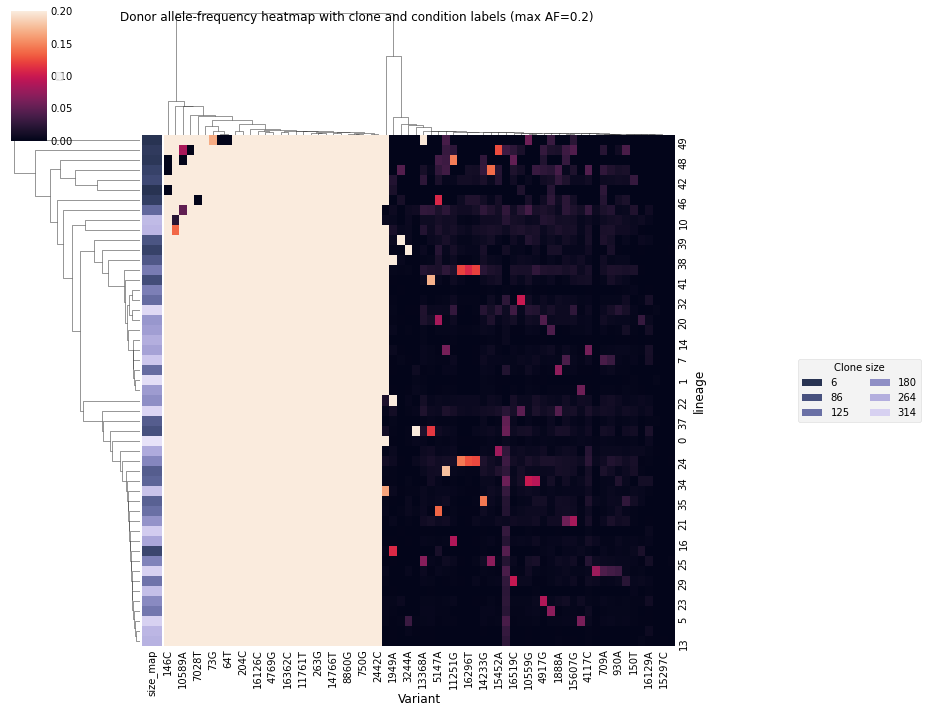

In [15]:
%matplotlib inline
################
## Plotting
## Plot average of each clone MT vaf and the corresponding depth
################
## 1.
g = sns.clustermap(mean_af,
                   row_cluster=True, col_cluster=True, vmax=0.2, vmin=0, row_colors=sizes[["size_map"]])
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.2)")
#plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=plt.gcf().transFigure, loc='center right')
ut.plot_continuous_legend(g, anno_labels,anno_lut,n_labs=6)
g.ax_heatmap.legend(title="Clone size",bbox_to_anchor=(1.5, 0.5), 
                    ncol=2, loc="center right", borderaxespad=1)
fu.helper_save(out_f+".NoCondition.clust.max2.AF.png")


cmap None


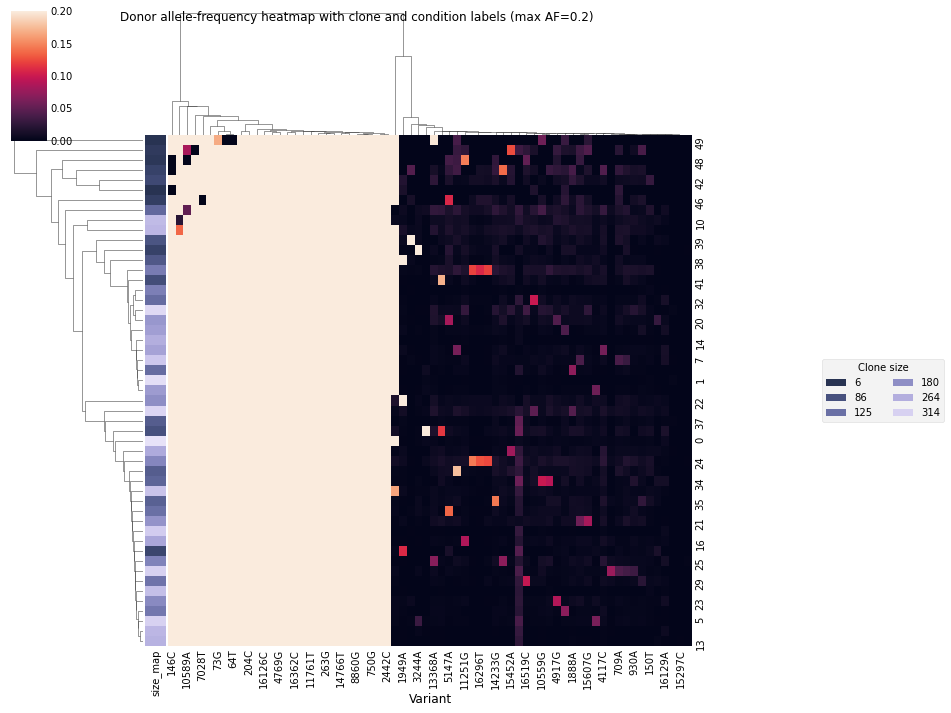

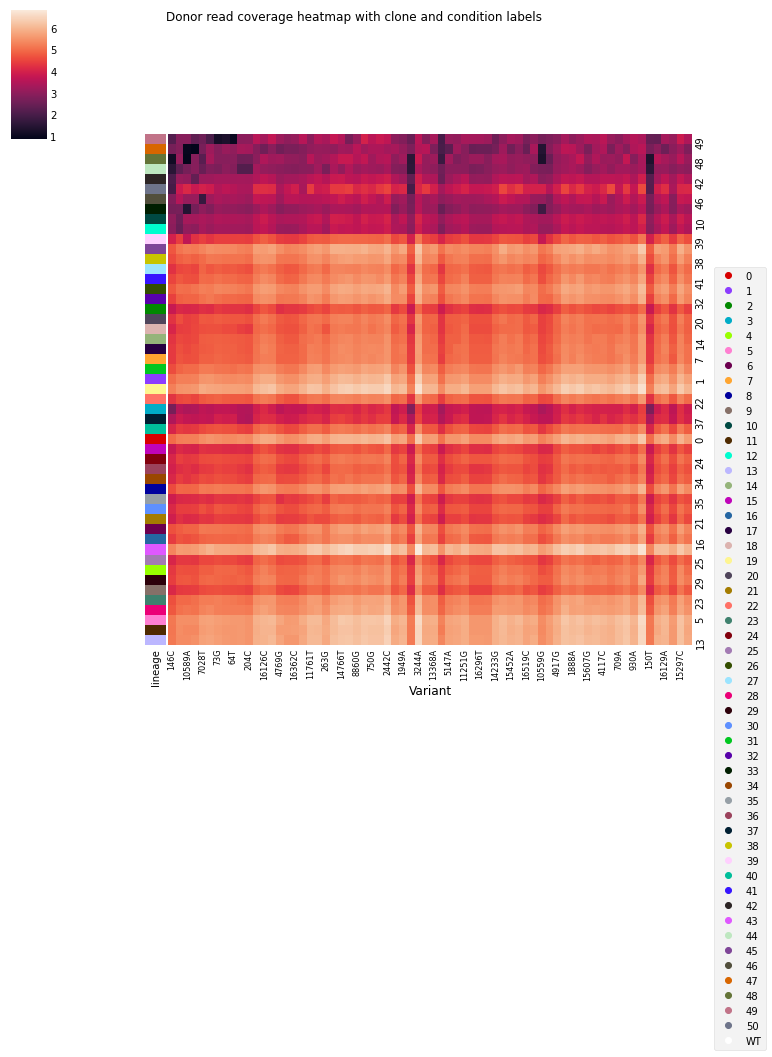

In [16]:

# inds = g.dendrogram_row.dendrogram["leaves"]
# cols = g.dendrogram_col.dendrogram["leaves"]
# g1d = ch.plot_cluster(mean_dp.iloc[inds, cols], to_row_clust=False, to_col_clust=False, 
#                         row_meta=anno_dp.iloc[inds])
# plt.savefig(out_f+".NoCondition.raw.clust.DP.png")#, f=g1d.figure)


# g1 = ch.plot_cluster((mean_af.reset_index(drop=True)), row_meta=anno, #curr_labels[["condition", "lineage"]], 
#                     to_row_clust=True, to_col_clust=True)
# g1.figure.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.4)")
# plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
# fu.helper_save(out_f+".NoCondition.raw.clust.AF.png")#, f=g1.figure)

# inds = g1.dendrogram_row.dendrogram["leaves"]
# cols = g1.dendrogram_col.dendrogram["leaves"]
# g1d = ch.plot_cluster(mean_dp.iloc[inds, cols], to_row_clust=False, to_col_clust=False, 
#                         row_meta=anno_dp.iloc[inds])
# fu.helper_save(out_f+".NoCondition.raw.clust.DP.png")#, f=g1d.figure)


# ## 2.
# g2 = ch.plot_cluster((mean_af.reset_index(drop=True)), row_meta=anno, #curr_labels[["condition", "lineage"]], 
#                     to_row_clust=True, to_col_clust=True, vmax=0.4, vmin=0)
# plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
# g2.figure.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.4)")
# fu.helper_save(out_f+".NoCondition.raw.clust.max4.AF.png")
# inds = g2.dendrogram_row.dendrogram["leaves"]
# cols = g2.dendrogram_col.dendrogram["leaves"]
# ch.plot_cluster(mean_dp.iloc[inds,cols], to_row_clust=False, to_col_clust=False, 
#                         row_meta=anno_dp.iloc[inds])
# fu.helper_save(out_f+".NoCondition.raw.clust.max4.DP.png")



%matplotlib inline
## 3.
g = sns.clustermap(na_concat,
                   row_cluster=True, col_cluster=True, vmax=0.2, vmin=0, row_colors=sizes[["size_map"]])
# g = ch.plot_cluster(na_concat, row_meta=na_anno, #curr_labels[["condition", "lineage"]], 
#                     to_row_clust=True, to_col_clust=True, vmax=0.2, vmin=0)

ut.plot_continuous_legend(g, anno_labels,anno_lut,n_labs=6)
#plt.savefig(out_f+".NoCondition.na.clust.max2.AF.png")

#plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.2)")
g.ax_heatmap.legend(title="Clone size",bbox_to_anchor=(1.5, 0.5), 
                    ncol=2, loc="center right", borderaxespad=1)
fu.helper_save(out_f+".NoCondition.na.clust.max2.AF.png",to_pdf=False)

inds = g.dendrogram_row.dendrogram["leaves"]
cols = g.dendrogram_col.dendrogram["leaves"]
ch.plot_cluster(na_dp_concat.iloc[inds,cols], to_row_clust=False, to_col_clust=False, 
                        row_meta=na_anno.iloc[inds], )
plt.suptitle("Donor read coverage heatmap with clone and condition labels ")
fu.helper_save(out_f+".NoCondition.na.clust.max2.DP.png",to_pdf=False)




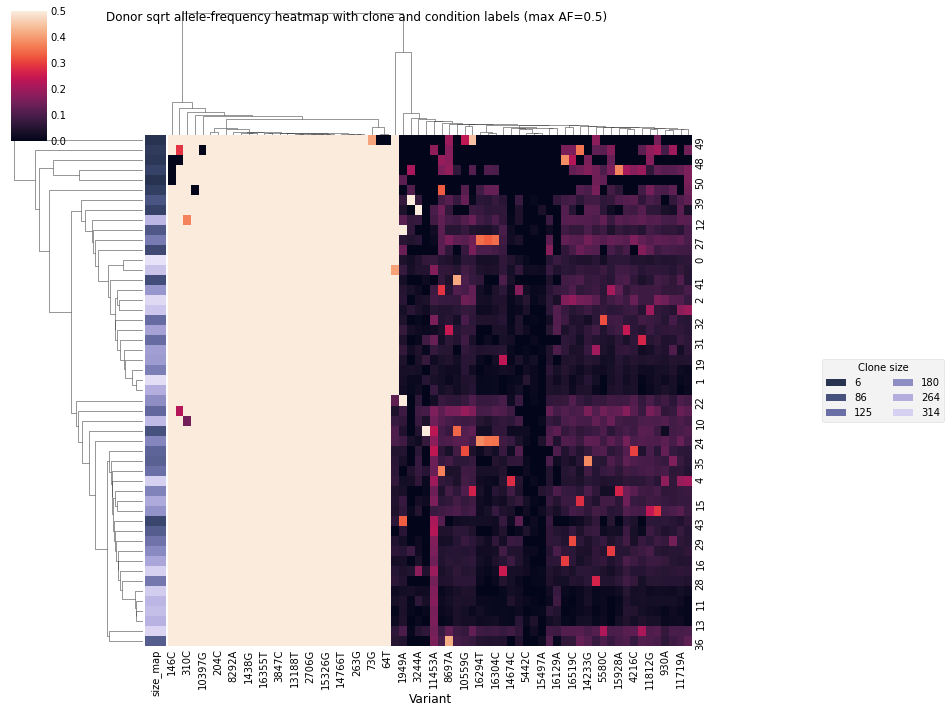

In [17]:
# ## 4.
g = sns.clustermap(np.sqrt(na_concat), 
                   row_cluster=True, col_cluster=True, vmax=0.5, vmin=0, row_colors=sizes[["size_map"]])

# g = ch.plot_cluster(np.sqrt(na_concat), row_meta=na_anno, #curr_labels[["condition", "lineage"]], 
#                     to_row_clust=False, to_col_clust=True, vmax=0.5, vmin=0)
ut.plot_continuous_legend(g, anno_labels,anno_lut,n_labs=6)

plt.suptitle("Donor sqrt allele-frequency heatmap with clone and condition labels (max AF=0.5)")
g.ax_heatmap.legend(title="Clone size",bbox_to_anchor=(1.5, 0.5), 
                    ncol=2, loc="center right", borderaxespad=1)
fu.helper_save(out_f+".NoCondition.na.max5.AF.png",to_pdf=False)

#inds = g.dendrogram_row.dendrogram["leaves"]
# cols = g.dendrogram_col.dendrogram["leaves"]
# ch.plot_cluster(na_dp_concat.iloc[:,cols], to_row_clust=False, to_col_clust=False, 
#                         row_meta=na_anno.iloc[inds])
# fu.helper_save(out_f+".NoCondition.na.max5.DP.png")

#plt.close('all')

## Run for median

In [18]:
median_out_f = out_f + "_MEDIAN"

median_af = curr_labels.groupby(["lineage"]).apply(calc_median, af=AF_df)
anno = median_af.reset_index()[["lineage"]]

#median_dp = curr_labels.groupby(["lineage"]).apply(calc_median, af=nlog2(DP_df))
median_dp = curr_labels.groupby(["lineage"]).apply(calc_median, af=np.log2(DP_df+1))
anno_dp = median_dp.reset_index()[["lineage"]]
median_dp = median_dp.reset_index(drop=True)

na_cells = curr_labels.loc[curr_labels["lineage"].isnull()]
na_median_af = na_cells.groupby("condition").apply(calc_median, af=AF_df)

if not (na_median_af.shape[0] == 0):
    print('na shape', na_median_af.shape)
    na_anno = pd.concat((anno,pd.DataFrame({"lineage":["None"]*len(na_median_af.index)})), ignore_index=True)
    na_concat = pd.concat((median_af.reset_index(drop=True), na_median_af.reset_index(drop=True)), ignore_index=True)
    na_median_dp = na_cells.groupby("condition").apply(calc_median, af=np.log2(DP_df+1))
    na_dp_concat = pd.concat((median_dp, na_median_dp.reset_index(drop=True)), ignore_index=True)
else:
    na_anno = anno
    na_concat = median_af.reset_index(drop=True)
    na_dp_concat = median_dp
     
median_af  

Variant,10397G,10463C,10559G,10589A,11251G,11453A,11719A,11761T,11812G,13188T,...,750G,7598A,827G,8292A,8461T,8697A,8743A,8860G,930A,9899C
lineage,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.000000,0.000000,1.0,0.000000,0.0,0.0,1.0,0.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,1.0,0.0,0.0
1,1.0,0.000000,0.000000,1.0,0.000000,0.0,0.0,1.0,0.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,1.0,0.0,0.0
2,1.0,0.000000,0.000000,1.0,0.000000,0.0,0.0,1.0,0.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,1.0,0.0,0.0
3,1.0,0.000000,0.000000,1.0,0.000000,0.0,0.0,1.0,0.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,1.0,0.0,0.0
4,1.0,0.000000,0.000000,1.0,0.000000,0.0,0.0,1.0,0.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,1.0,0.0,0.0
5,1.0,0.000000,0.000000,1.0,0.000000,0.0,0.0,1.0,0.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,1.0,0.0,0.0
6,1.0,0.000000,0.000000,1.0,0.000000,0.0,0.0,1.0,0.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,1.0,0.0,0.0
7,1.0,0.000000,0.000000,1.0,0.000000,0.0,0.0,1.0,0.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,1.0,0.0,0.0
8,1.0,0.000000,0.000000,1.0,0.000000,0.0,0.0,1.0,0.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,1.0,0.0,0.0


In [19]:
# median_out_f = out_f + "_MEDIAN"
# median_af = curr_labels.groupby(["lineage", "condition"]).apply(calc_median, af=AF_df)
# anno = median_af.reset_index()[["lineage", "condition"]]

# #median_dp = curr_labels.groupby(["lineage", "condition"]).apply(calc_median, af=nlog2(DP_df))
# median_dp = curr_labels.groupby(["lineage", "condition"]).apply(calc_median, af=np.log2(DP_df+1))
# anno_dp = median_dp.reset_index()[["lineage", "condition"]]
# median_dp = median_dp.reset_index(drop=True)

# na_cells = curr_labels.loc[curr_labels["lineage"].isnull()]
# na_median_af = na_cells.groupby("condition").apply(calc_median, af=AF_df)

# if not (na_median_af.shape[0] == 0):
#     print('na shape', na_median_af.shape)
#     na_anno = pd.concat((anno,pd.DataFrame({"lineage":["None"]*len(na_median_af.index), "condition":na_median_af.index})), 
#                         ignore_index=True)
#     na_concat = pd.concat((median_af.reset_index(drop=True), na_median_af.reset_index(drop=True)), ignore_index=True)
#     na_median_dp = na_cells.groupby("condition").apply(calc_median, af=np.log2(DP_df+1))
#     na_dp_concat = pd.concat((median_dp, na_median_dp.reset_index(drop=True)), ignore_index=True)
# else:
#     na_anno = anno
#     na_concat = median_af.reset_index(drop=True)
#     na_dp_concat = median_dp
     
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


cmap None


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


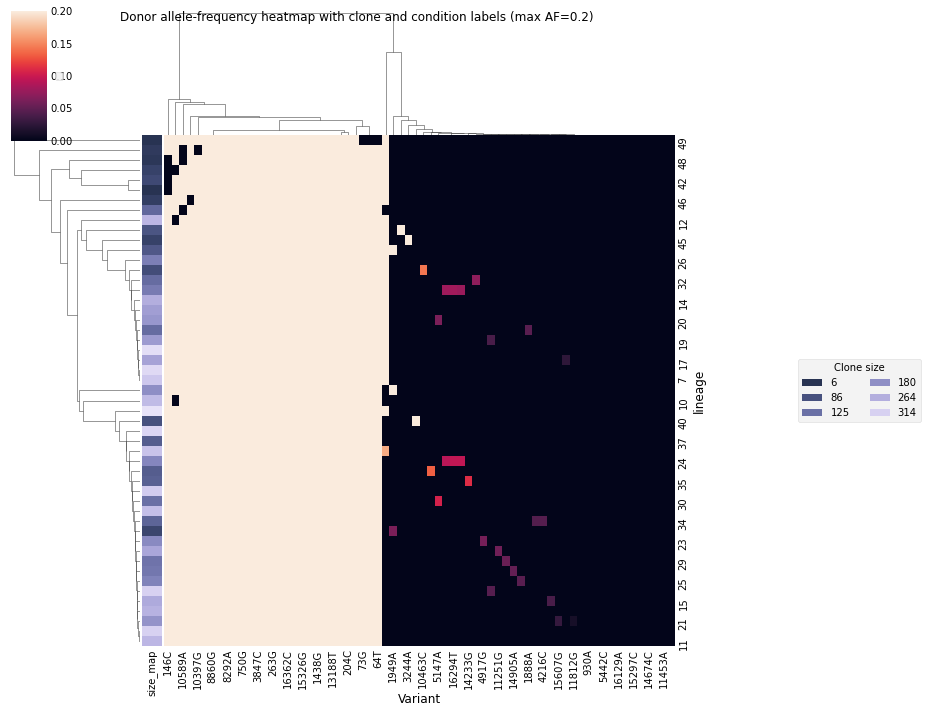

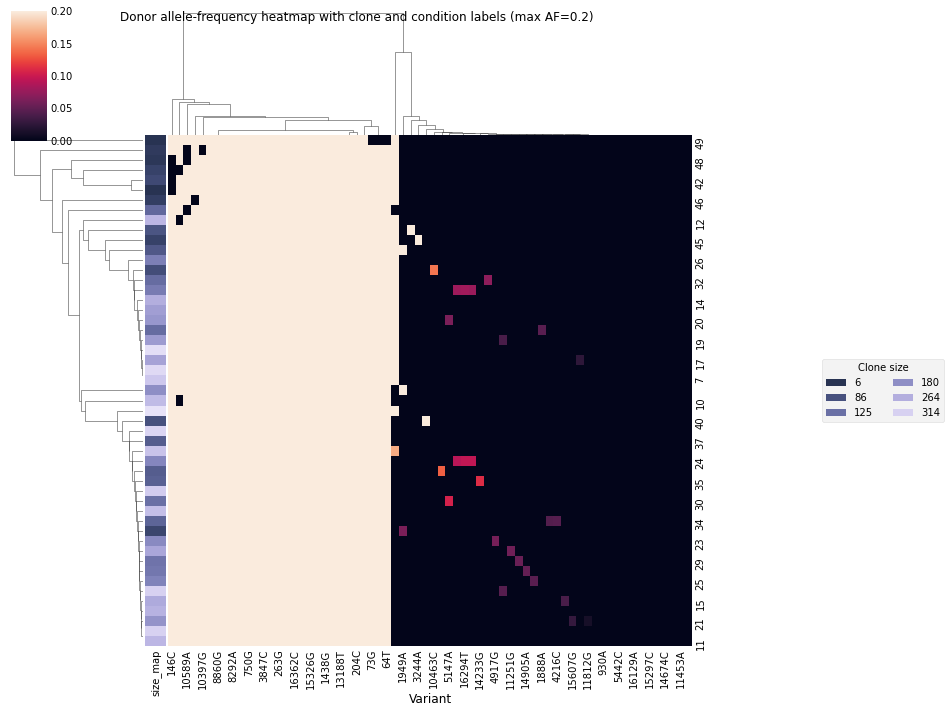

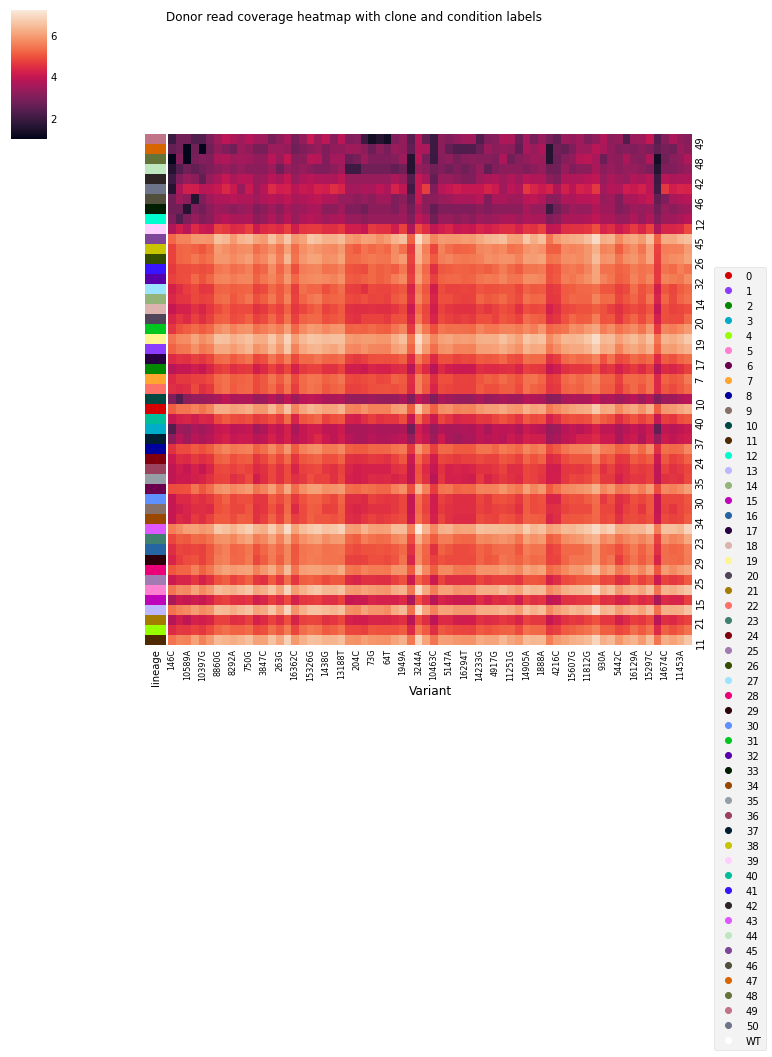

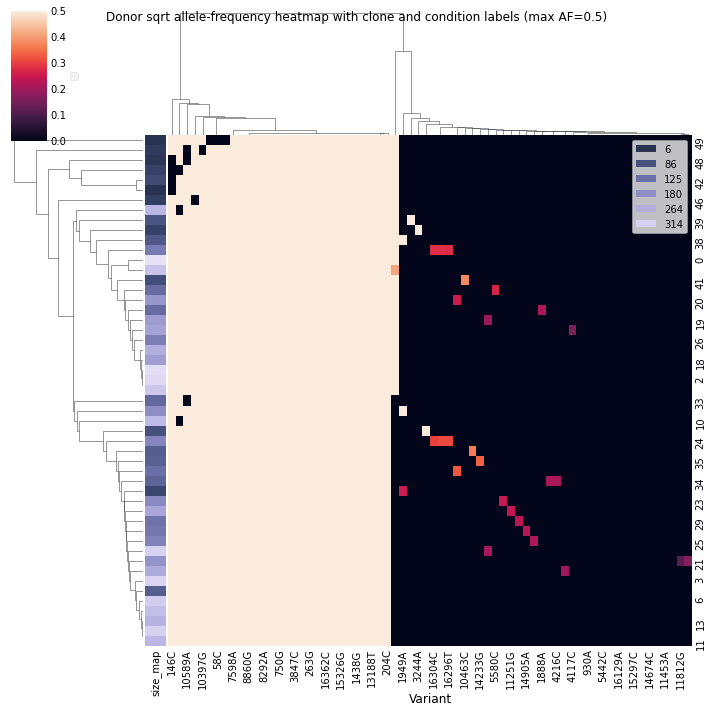

In [20]:
%matplotlib inline
################
## Plotting
## Plot median of each clone MT vaf and the corresponding depth
################
## 1.
g = sns.clustermap(median_af,
                   row_cluster=True, col_cluster=True, vmax=0.2, vmin=0, row_colors=sizes[["size_map"]])
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.2)")
#plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=plt.gcf().transFigure, loc='center right')
ut.plot_continuous_legend(g, anno_labels,anno_lut,n_labs=6)
g.ax_heatmap.legend(title="Clone size",bbox_to_anchor=(1.5, 0.5), 
                    ncol=2, loc="center right", borderaxespad=1)
fu.helper_save(median_out_f+".NoCondition.clust.max2.AF.png",to_pdf=False)


## 3.
g = sns.clustermap(na_concat,
                   row_cluster=True, col_cluster=True, vmax=0.2, vmin=0, row_colors=sizes[["size_map"]])
# g = ch.plot_cluster(na_concat, row_meta=na_anno, #curr_labels[["condition", "lineage"]], 
#                     to_row_clust=True, to_col_clust=True, vmax=0.2, vmin=0)

ut.plot_continuous_legend(g, anno_labels,anno_lut,n_labs=6)
g.ax_heatmap.legend(title="Clone size",bbox_to_anchor=(1.5, 0.5), 
                    ncol=2, loc="center right", borderaxespad=1)
#plt.savefig(median_out_f+".NoCondition.na.clust.max2.AF.png")

#plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.2)")
fu.helper_save(median_out_f+".NoCondition.na.clust.max2.AF.png")

inds = g.dendrogram_row.dendrogram["leaves"]
cols = g.dendrogram_col.dendrogram["leaves"]
ch.plot_cluster(na_dp_concat.iloc[inds,cols], to_row_clust=False, to_col_clust=False, 
                        row_meta=na_anno.iloc[inds], )
plt.suptitle("Donor read coverage heatmap with clone and condition labels ")
fu.helper_save(median_out_f+".NoCondition.na.clust.max2.DP.png",to_pdf=False)



# ## 4.
g = sns.clustermap(np.sqrt(na_concat), 
                   row_cluster=True, col_cluster=True, vmax=0.5, vmin=0, row_colors=sizes[["size_map"]])
ut.plot_continuous_legend(g, anno_labels,anno_lut,n_labs=6)

# g = ch.plot_cluster(np.sqrt(na_concat), row_meta=na_anno, #curr_labels[["condition", "lineage"]], 
#                     to_row_clust=False, to_col_clust=True, vmax=0.5, vmin=0)
plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))
plt.suptitle("Donor sqrt allele-frequency heatmap with clone and condition labels (max AF=0.5)")
fu.helper_save(median_out_f+".NoCondition.na.max5.AF.png",to_pdf=False)


In [21]:

# ################
# ## Plotting
# ################
# ## 1.
# g1 = ch.plot_cluster((median_af.reset_index(drop=True)), row_meta=anno, #curr_labels[["condition", "lineage"]], 
#                     to_row_clust=True, to_col_clust=True)
# g1.figure.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.4)")
# plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
# fu.helper_save(median_out_f+".raw.clust.AF.png")#, f=g1.figure)

# inds = g1.dendrogram_row.dendrogram["leaves"]
# cols = g1.dendrogram_col.dendrogram["leaves"]
# g1d = ch.plot_cluster(median_dp.iloc[inds, cols], to_row_clust=False, to_col_clust=False, 
#                         row_meta=anno_dp.iloc[inds])
# fu.helper_save(median_out_f+".raw.clust.DP.png") #, f=g1d.figure)


# # ## 2.
# g2 = ch.plot_cluster((median_af.reset_index(drop=True)), row_meta=anno, #curr_labels[["condition", "lineage"]], 
#                     to_row_clust=True, to_col_clust=True, vmax=0.4, vmin=0)
# plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
# g2.figure.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.4)")
# fu.helper_save(median_out_f+".raw.clust.max4.AF.png")
# inds = g2.dendrogram_row.dendrogram["leaves"]
# cols = g2.dendrogram_col.dendrogram["leaves"]
# ch.plot_cluster(median_dp.iloc[inds,cols], to_row_clust=False, to_col_clust=False, 
#                         row_meta=anno_dp.iloc[inds])
# fu.helper_save(median_out_f+".raw.clust.max4.DP.png")


# ## 3.
# g = ch.plot_cluster(na_concat, row_meta=na_anno, #curr_labels[["condition", "lineage"]], 
#                     to_row_clust=True, to_col_clust=True, vmax=0.2, vmin=0)
# plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
# plt.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.2)")
# fu.helper_save(median_out_f+".na.clust.max2.AF.png")

# inds = g.dendrogram_row.dendrogram["leaves"]
# cols = g.dendrogram_col.dendrogram["leaves"]
# ch.plot_cluster(na_dp_concat.iloc[inds,cols], to_row_clust=False, to_col_clust=False, 
#                         row_meta=na_anno.iloc[inds])
# plt.suptitle("Donor read coverage heatmap with clone and condition labels ")
# fu.helper_save(median_out_f+".na.clust.max2.DP.png")


# # ## 4.
# g = ch.plot_cluster(np.sqrt(na_concat), row_meta=na_anno, #curr_labels[["condition", "lineage"]], 
#                     to_row_clust=False, to_col_clust=True, vmax=0.5, vmin=0)
# plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
# plt.suptitle("Donor sqrt allele-frequency heatmap with clone and condition labels (max AF=0.5)")
# fu.helper_save(median_out_f+".na.max5.AF.png")
# #inds = g.dendrogram_row.dendrogram["leaves"]
# cols = g.dendrogram_col.dendrogram["leaves"]
# ch.plot_cluster(na_dp_concat.iloc[:,cols], to_row_clust=False, to_col_clust=False, 
#                         row_meta=na_anno.iloc[inds])
# fu.helper_save(median_out_f+".na.max5.DP.png")

# #plt.close('all')

## Separate conditions

cmap None


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


cmap None
cmap None


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


cmap None
cmap None


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


cmap None
cmap None


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


cmap None


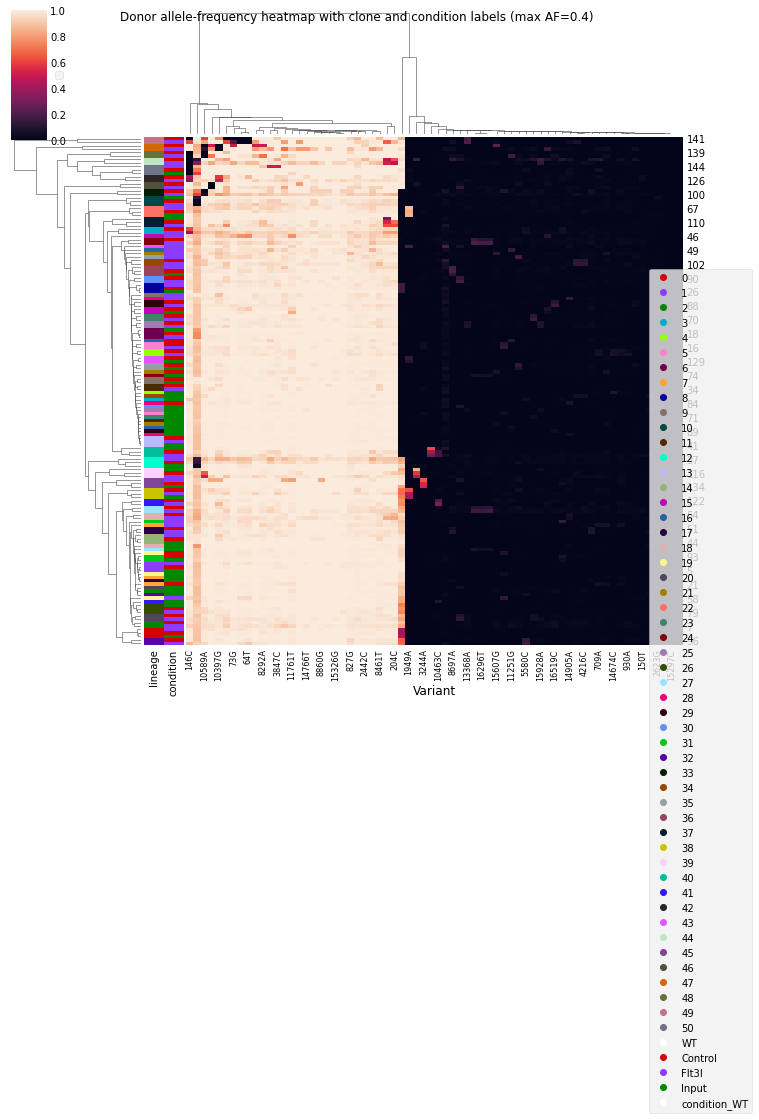

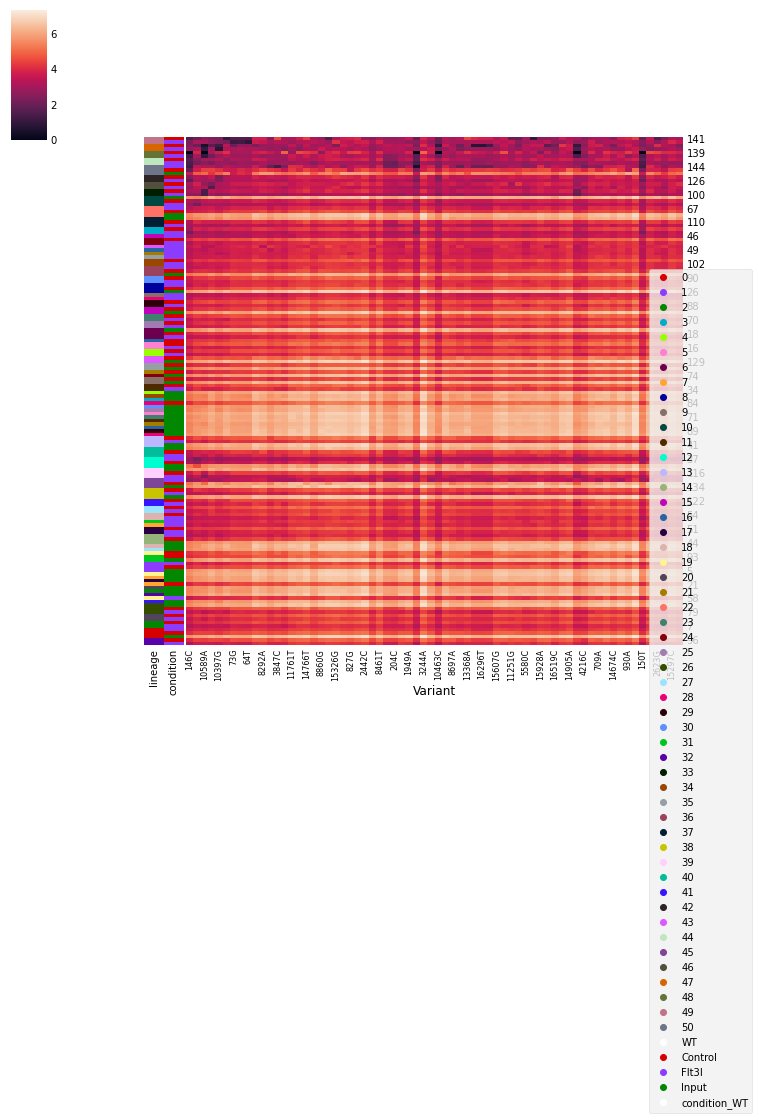

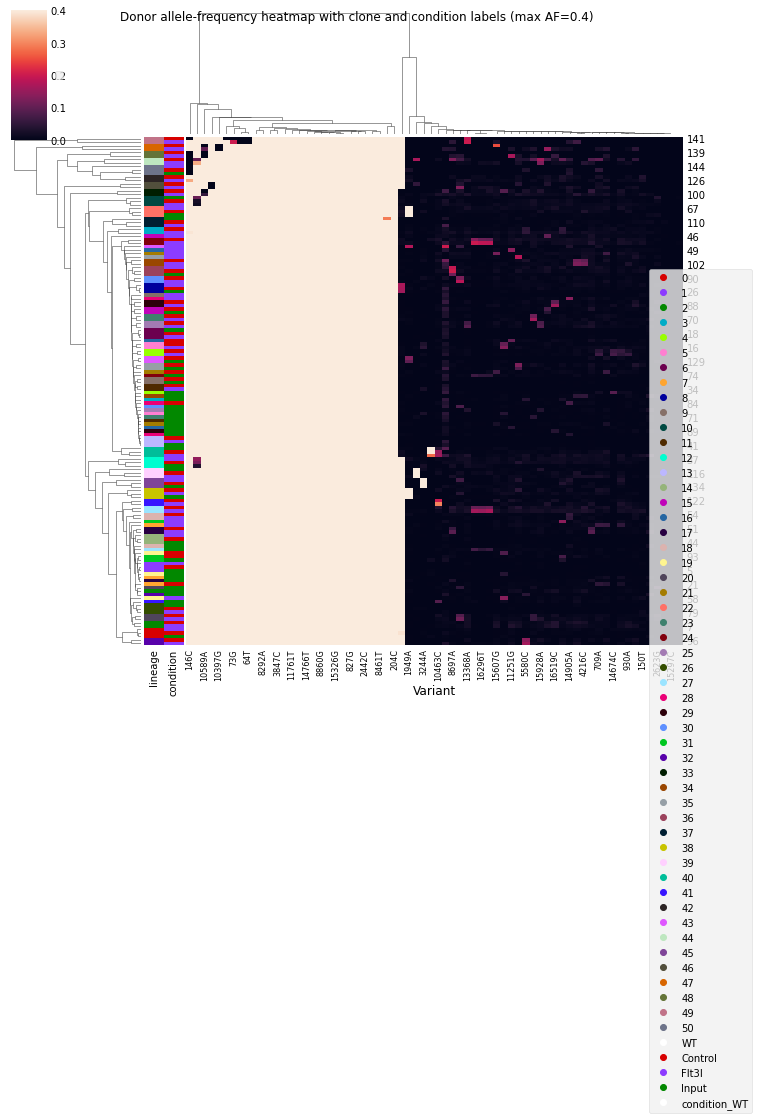

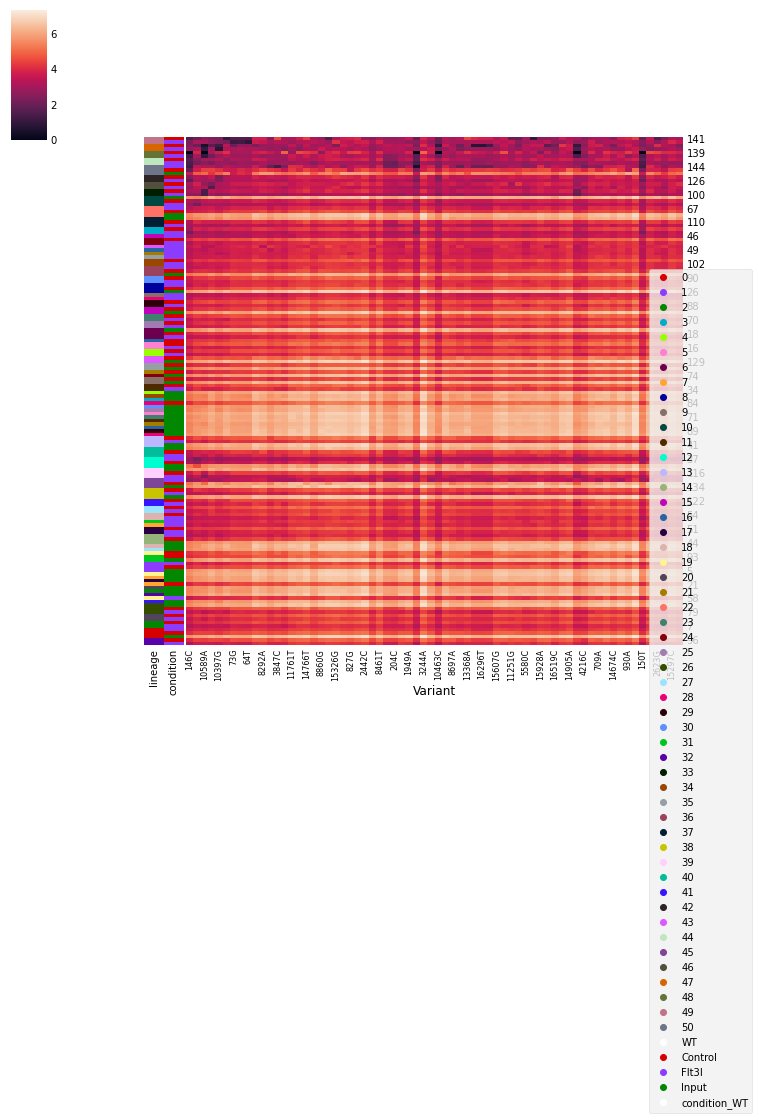

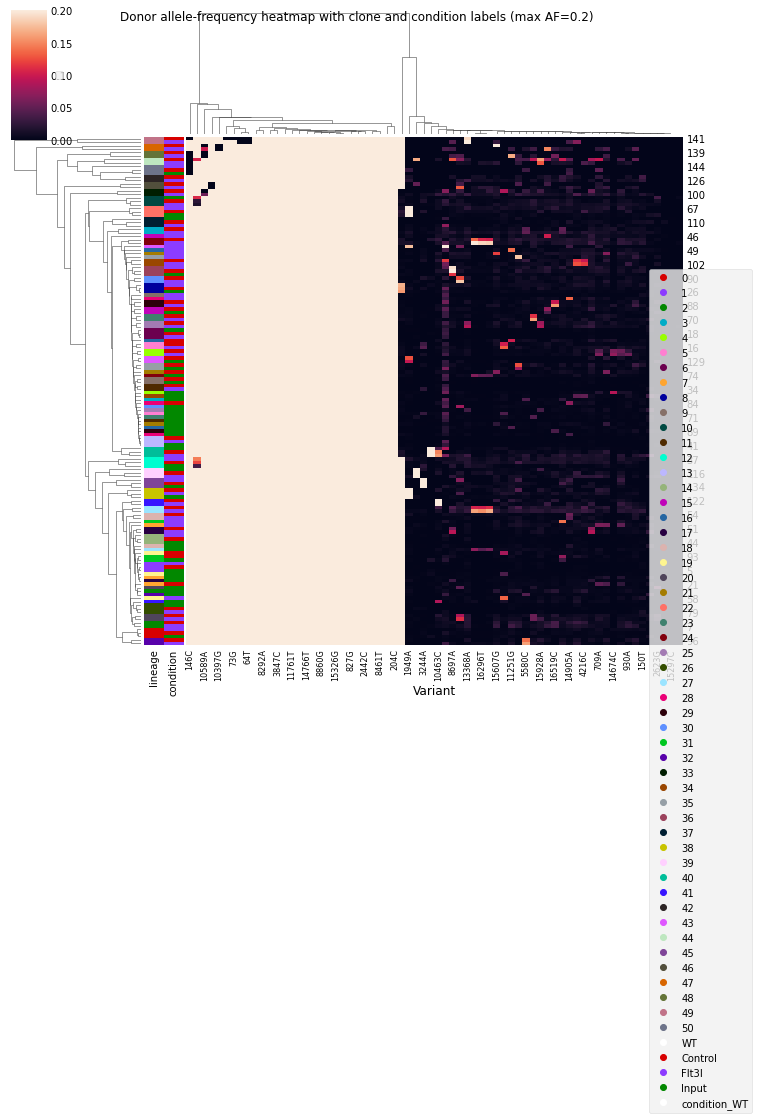

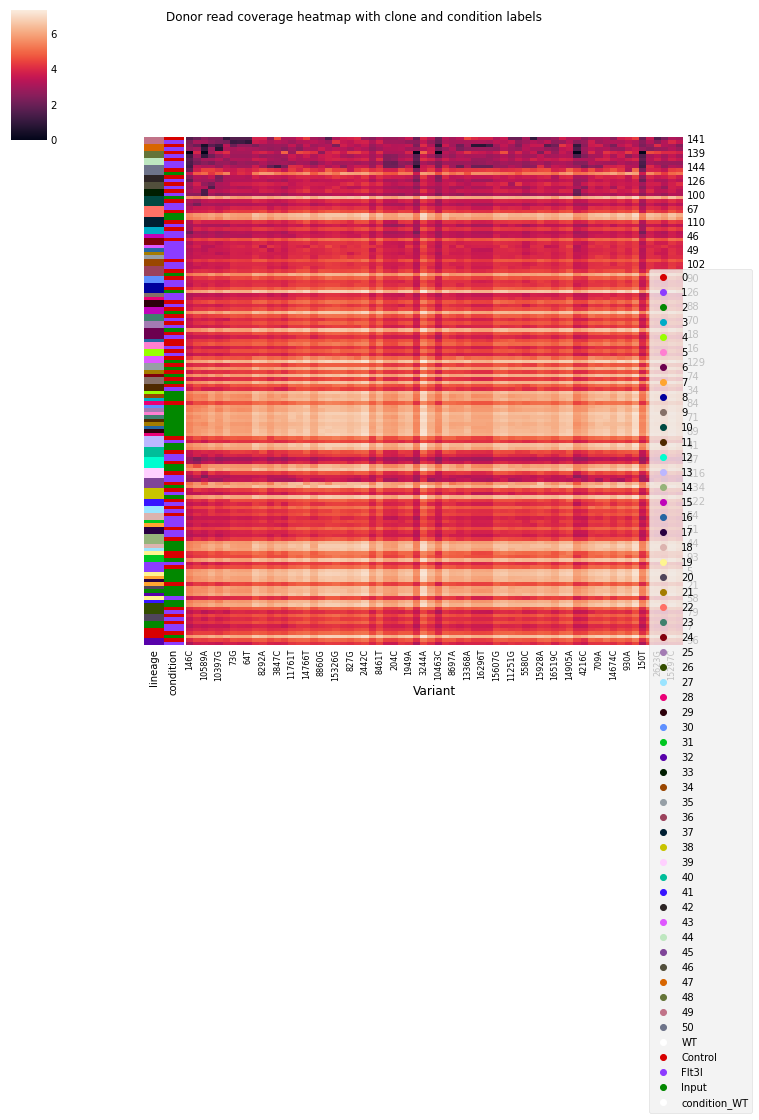

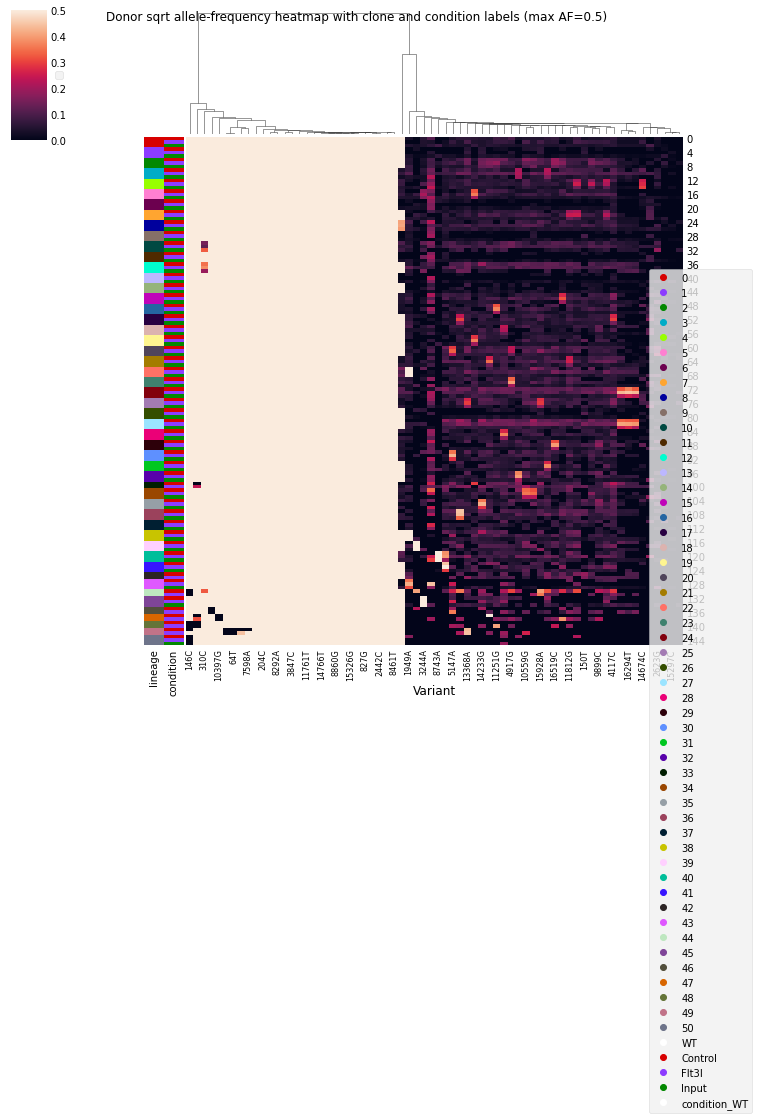

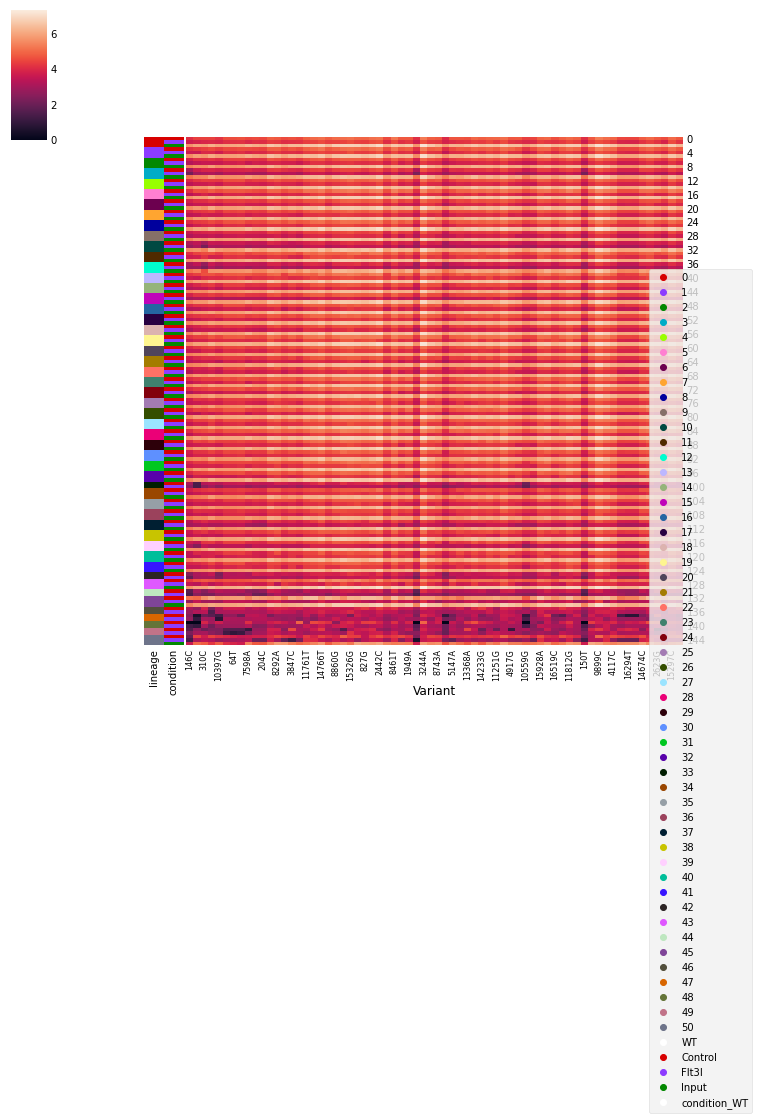

In [22]:
mean_af = curr_labels.groupby(["lineage", "condition"]).apply(calc_mean, af=AF_df)
anno = mean_af.reset_index()[["lineage", "condition"]]

#mean_dp = curr_labels.groupby(["lineage", "condition"]).apply(calc_mean, af=nlog2(DP_df))
mean_dp = curr_labels.groupby(["lineage", "condition"]).apply(calc_mean, af=np.log2(DP_df+1))
anno_dp = mean_dp.reset_index()[["lineage", "condition"]]
mean_dp = mean_dp.reset_index(drop=True)

na_cells = curr_labels.loc[curr_labels["lineage"].isnull()]
na_mean_af = na_cells.groupby("condition").apply(calc_mean, af=AF_df)

if not (na_mean_af.shape[0] == 0):
    print('na shape', na_mean_af.shape)
    na_anno = pd.concat((anno,pd.DataFrame({"lineage":["None"]*len(na_mean_af.index), "condition":na_mean_af.index})), 
                        ignore_index=True)
    na_concat = pd.concat((mean_af.reset_index(drop=True), na_mean_af.reset_index(drop=True)), ignore_index=True)
    na_mean_dp = na_cells.groupby("condition").apply(calc_mean, af=np.log2(DP_df+1))
    na_dp_concat = pd.concat((mean_dp, na_mean_dp.reset_index(drop=True)), ignore_index=True)
else:
    na_anno = anno
    na_concat = mean_af.reset_index(drop=True)
    na_dp_concat = mean_dp
     

################
## Plotting
################
## 1.
g1 = ch.plot_cluster((mean_af.reset_index(drop=True)), row_meta=anno, #curr_labels[["condition", "lineage"]], 
                    to_row_clust=True, to_col_clust=True)
g1.figure.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.4)")
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
fu.helper_save(out_f+".raw.clust.AF.png")#, f=g1.figure)

inds = g1.dendrogram_row.dendrogram["leaves"]
cols = g1.dendrogram_col.dendrogram["leaves"]
g1d = ch.plot_cluster(mean_dp.iloc[inds, cols], to_row_clust=False, to_col_clust=False, 
                        row_meta=anno_dp.iloc[inds])
fu.helper_save(out_f+".raw.clust.DP.png")#, f=g1d.figure)


# ## 2.
g2 = ch.plot_cluster((mean_af.reset_index(drop=True)), row_meta=anno, #curr_labels[["condition", "lineage"]], 
                    to_row_clust=True, to_col_clust=True, vmax=0.4, vmin=0)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
g2.figure.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.4)")
fu.helper_save(out_f+".raw.clust.max4.AF.png")
inds = g2.dendrogram_row.dendrogram["leaves"]
cols = g2.dendrogram_col.dendrogram["leaves"]
ch.plot_cluster(mean_dp.iloc[inds,cols], to_row_clust=False, to_col_clust=False, 
                        row_meta=anno_dp.iloc[inds])
fu.helper_save(out_f+".raw.clust.max4.DP.png")


## 3.
g = ch.plot_cluster(na_concat, row_meta=na_anno, #curr_labels[["condition", "lineage"]], 
                    to_row_clust=True, to_col_clust=True, vmax=0.2, vmin=0)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.2)")
fu.helper_save(out_f+".na.clust.max2.AF.png")

inds = g.dendrogram_row.dendrogram["leaves"]
cols = g.dendrogram_col.dendrogram["leaves"]
ch.plot_cluster(na_dp_concat.iloc[inds,cols], to_row_clust=False, to_col_clust=False, 
                        row_meta=na_anno.iloc[inds])
plt.suptitle("Donor read coverage heatmap with clone and condition labels ")
fu.helper_save(out_f+".na.clust.max2.DP.png")


# ## 4.
g = ch.plot_cluster(np.sqrt(na_concat), row_meta=na_anno, #curr_labels[["condition", "lineage"]], 
                    to_row_clust=False, to_col_clust=True, vmax=0.5, vmin=0)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.suptitle("Donor sqrt allele-frequency heatmap with clone and condition labels (max AF=0.5)")
fu.helper_save(out_f+".na.max5.AF.png")
#inds = g.dendrogram_row.dendrogram["leaves"]
cols = g.dendrogram_col.dendrogram["leaves"]
ch.plot_cluster(na_dp_concat.iloc[:,cols], to_row_clust=False, to_col_clust=False, 
                        row_meta=na_anno.iloc[inds])
fu.helper_save(out_f+".na.max5.DP.png")

#plt.close('all')